In [3]:
import zipfile
zipfile.ZipFile('/content/drive/MyDrive/seg_test.zip', 'r').extractall('')
zipfile.ZipFile('/content/drive/MyDrive/seg_train.zip', 'r').extractall('')

In [4]:
!pip install keras tensorflow

In [6]:
import os
num_classes = len(os.listdir('/content/seg_train'))

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/seg_test',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/seg_train',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = valid_ds.map(process)
training_ds = train_ds.map(process)

num_classes = len(train_ds.class_names)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(training_ds, epochs=10, validation_data=validation_ds)




Found 3000 files belonging to 6 classes.
Found 14034 files belonging to 6 classes.
Epoch 1/10
439/439 [==============================] - 58s 125ms/step - loss: 1.4200 - accuracy: 0.4396 - val_loss: 1.1395 - val_accuracy: 0.5890
Epoch 2/10
439/439 [==============================] - 55s 124ms/step - loss: 1.0947 - accuracy: 0.5765 - val_loss: 0.8775 - val_accuracy: 0.6817
Epoch 3/10
439/439 [==============================] - 54s 123ms/step - loss: 0.9494 - accuracy: 0.6468 - val_loss: 0.7868 - val_accuracy: 0.7407
Epoch 4/10
439/439 [==============================] - 54s 122ms/step - loss: 0.8496 - accuracy: 0.6921 - val_loss: 0.7105 - val_accuracy: 0.7603
Epoch 5/10
439/439 [==============================] - 54s 123ms/step - loss: 0.7515 - accuracy: 0.7366 - val_loss: 0.7372 - val_accuracy: 0.7383
Epoch 6/10
439/439 [==============================] - 55s 124ms/step - loss: 0.6726 - accuracy: 0.7638 - val_loss: 0.6565 - val_accuracy: 0.7793
Epoch 7/10
439/439 [===========================

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/seg_test/sea/20072.jpg'
img = image.load_img(img_path, target_size=(256, 256))

img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_array = tf.cast(img_array / 255., tf.float32)

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction[0])

class_names = train_ds.class_names
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)


1/1 [==============================] - 0s 18ms/step
Predicted class: sea


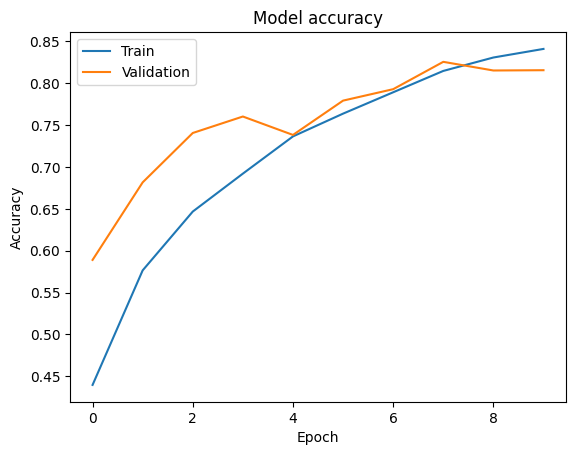

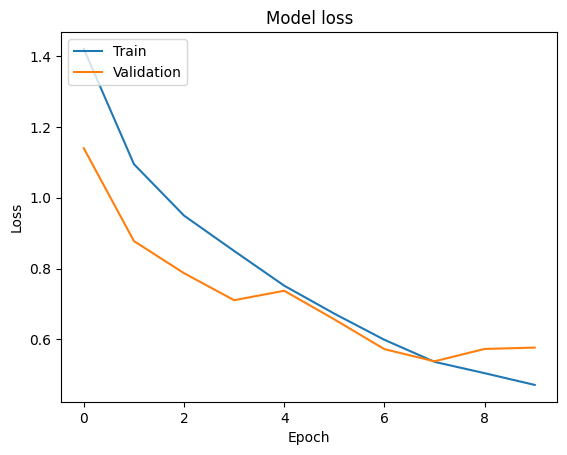

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()